<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_4/Lab_04_Exploration_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploration A The company who supplied the Products data in the lecture notes also want an investigation into their website. As last week, the data (https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv) shows the number of page hits per day.**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#Read DailyHits.csv
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv", index_col=0)
data.head(3)

,001,002,003,004,005,006,007,008,009,010,...,158,159,160,161,162,163,164,165,166,167
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1062,33,67,42,0,4,0,0,1,69,...,0,0,4,0,10,2,2,2,0,0
2019-01-02,976,41,72,19,2,0,0,14,1,62,...,5,0,0,7,0,0,0,0,1,3
2019-01-03,956,27,71,28,4,6,11,0,0,64,...,0,0,0,0,6,0,0,3,0,0


In [42]:
#Register pandas formatters and converters with matplotlib.
#This function modifies the global matplotlib.units.registry dictionary. pandas adds custom converters for
#-pd.Timestamp
#-pd.Period
#-np.datetime64
#-datetime.datetime
#-datetime.date
#-datetime.time
pd.plotting.register_matplotlib_converters()
data.head(3)

,001,002,003,004,005,006,007,008,009,010,...,158,159,160,161,162,163,164,165,166,167
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1062,33,67,42,0,4,0,0,1,69,...,0,0,4,0,10,2,2,2,0,0
2019-01-02,976,41,72,19,2,0,0,14,1,62,...,5,0,0,7,0,0,0,0,1,3
2019-01-03,956,27,71,28,4,6,11,0,0,64,...,0,0,0,0,6,0,0,3,0,0


In [43]:
#Convert to datetime objects:
data.index = pd.to_datetime(data.index)
data.head(3)

,001,002,003,004,005,006,007,008,009,010,...,158,159,160,161,162,163,164,165,166,167
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1062,33,67,42,0,4,0,0,1,69,...,0,0,4,0,10,2,2,2,0,0
2019-01-02,976,41,72,19,2,0,0,14,1,62,...,5,0,0,7,0,0,0,0,1,3
2019-01-03,956,27,71,28,4,6,11,0,0,64,...,0,0,0,0,6,0,0,3,0,0


#**1. Create a scatter plot of the two high volume pages against each other. Can you detect any correlationvisually?**

METHOD 1

> Indented block



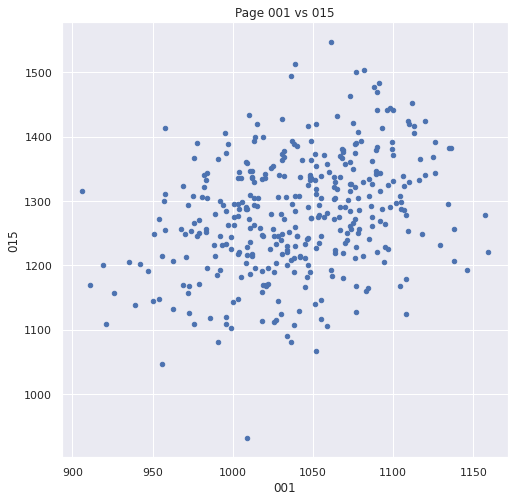

In [44]:
data.plot.scatter(x="001", y="015", title="Page 001 vs 015", figsize=(8, 8)    )

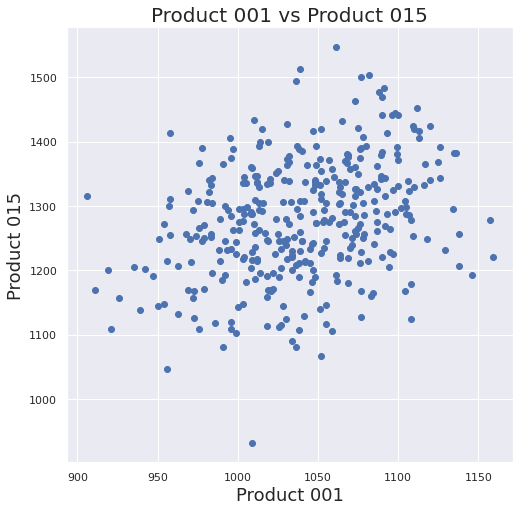

In [45]:
selected = ["001", "015"]
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        plt.figure(figsize=(8, 8))
        plt.scatter(data[name_i], data[name_j])
        plt.title('Product ' + name_i + ' vs Product ' + name_j, fontsize=20)
        plt.xlabel('Product ' + name_i, fontsize=18)
        plt.ylabel('Product ' + name_j, fontsize=18)
        plt.show()

#**2. Create a single visualisation showing scatter subplots for all pairs of medium volume pages against each other. Which two pages are most strongly correlated with each other? Which other pages seem to have some correlation, visually?**

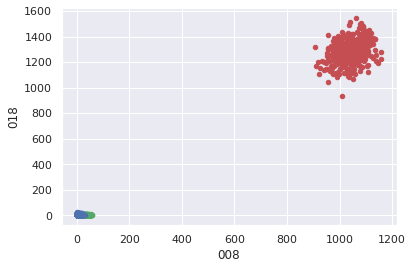

In [46]:
ax1 = data.plot(kind='scatter', x='001', y='015', color='r')    
ax2 = data.plot(kind='scatter', x='004', y='013', color='g', ax=ax1)    
ax3 = data.plot(kind='scatter', x='008', y='018', color='b', ax=ax1)

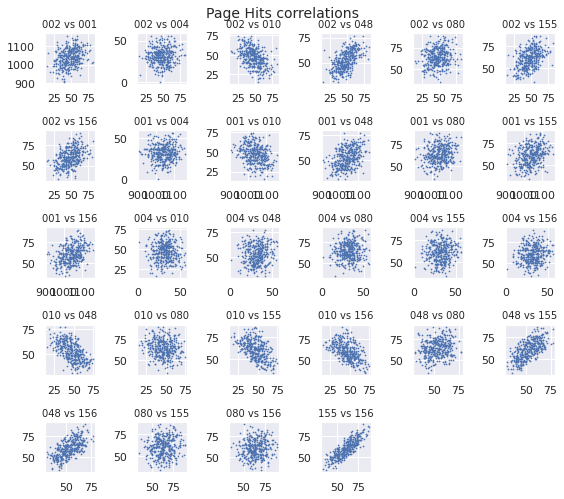

In [47]:
selected = ["002", "001", "004", "010", "048", "080", "155", "156"]
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Page Hits correlations', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(6, 6, counter) #6 rows and 6 columns
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

In [48]:
#THE LAST CORRELATION IN THE STRONGEST (AS THE DENSITY OF THE DOTS IS THE MOST HERE)

#**3. Now confirm your findings by creating a heatmap showing the correlations between all the high and medium volume pages. Comment on the strongest positive and inverse correlations.**

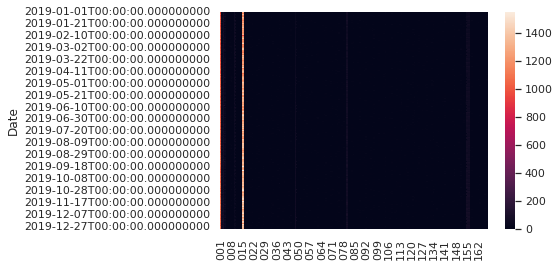

In [49]:
import seaborn as sns
 
# Default heatmap: just a visualization of this square matrix
sns.heatmap(data)

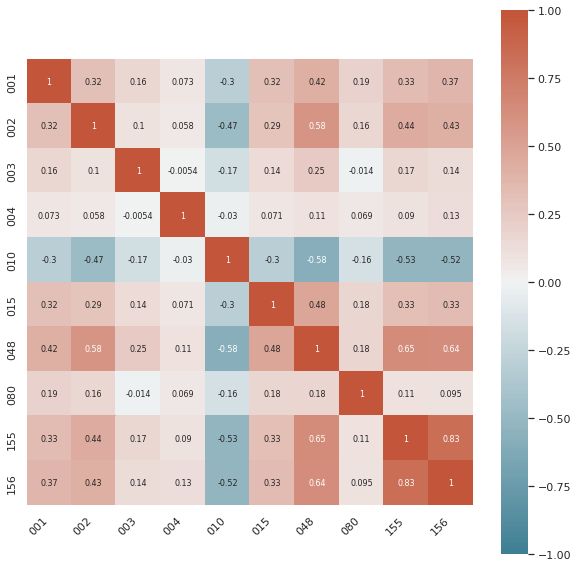

In [50]:
#Either of them works:
# selected = ["001", "015"] + ["002", "003", "004", "010", "048", "080", "155", "156"] #This one will be in random order
selected = data.columns[data.sum() > 5000] #This one will be in numerical order

#This bit of code plots the HEAT MAP:
plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [51]:
#STRONGEST CORRELATION BETWEEN 155 AND 156

#**4. After seeing the heatmap, the company has decided it is interested in all positive correlations where the Pearson coefficient is greater than 0.5. Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.**

In [52]:
#ANYTHING IN THE HEAT MAP THAT OVER 0.55

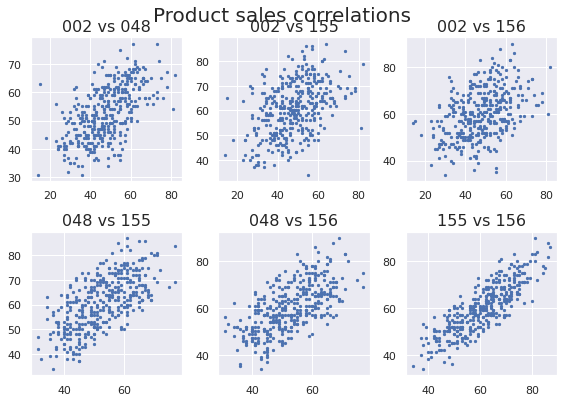

In [53]:
selected = ["002", "048", "155", "156"]

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Product sales correlations', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(3, 3, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4) #changing the wspace and hspace will fix the overlap between the labels
plt.tight_layout()
plt.show()




#**5. Now draw line plots with trendlines for the positively correlated pages you selected above.**

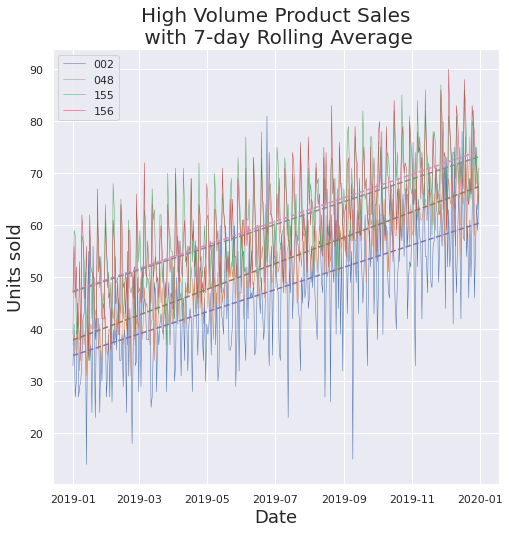

In [54]:
# period = 7
# rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
# plt.gca().set_prop_cycle(None)

for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle="--")

# plt.plot(rolling_average[selected], linewidth=2)
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('High Volume Product Sales\n with 7-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#6. The company is also interested in all inverse correlations where the Pearson coefficient is less than –0.55. Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.

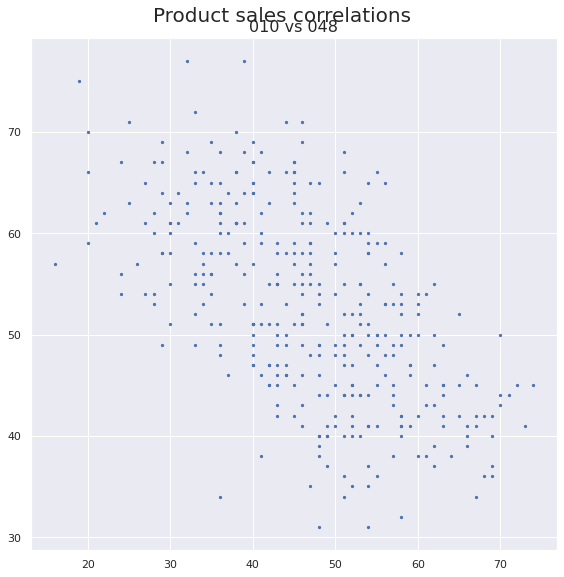

In [55]:
# Only one -0.55 in HEATMAP which is for the "010", "048" pair
selected = ["010", "048"]
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Product sales correlations', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(1, 1, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4) #changing the wspace and hspace will fix the overlap between the labels
plt.tight_layout()
plt.show()

#**7. Now draw line plots with trendlines for the inversely correlated pages you selected above. Your visualisations for items 4 and 7 should look something like those below.**

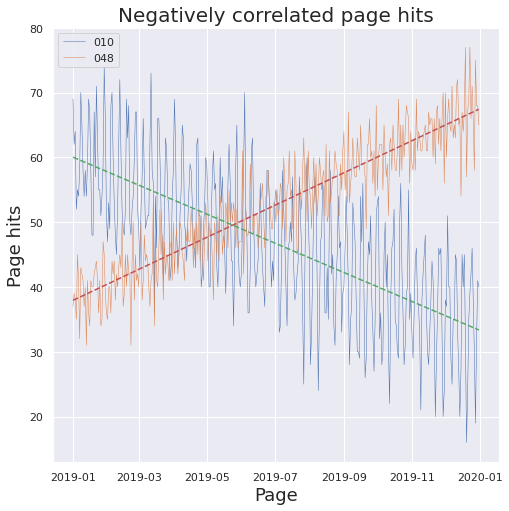

In [56]:
selected = ["010", "048"]

# period = 7
# rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
# plt.gca().set_prop_cycle(None)

for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle="--")

# plt.plot(rolling_average[selected], linewidth=2)
# plt.ylim(ymin=0)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Page hits', fontsize=18)
plt.title('Negatively correlated page hits', fontsize=20)
plt.legend(selected, loc=2)
plt.show()